If the distribution of our data is not normal, then we need to convert it into normal distribution. why? will see later

Since linear models like linear regression and logistic regression needs normally distributed data (gaussian bell curve), we use transformers to convert the data into normally distributed data.

Decision Tree and Random forest dont care about normally distributed data.

We will use titanic data again (🤡) but just with age, fare, and survived column, and see how the model performs without and then with function transformers

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [44]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.drop(columns=['pclass','sex','sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive','alone'], inplace=True)

In [46]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [48]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\sangh\AppData\Local\Temp\ipykernel_5644\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [49]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [50]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [51]:
X_train.head()

,age,fare
301,29.699118,23.2500
309,30.000000,56.9292
516,34.000000,10.5000
120,21.000000,73.5000
570,62.000000,10.5000


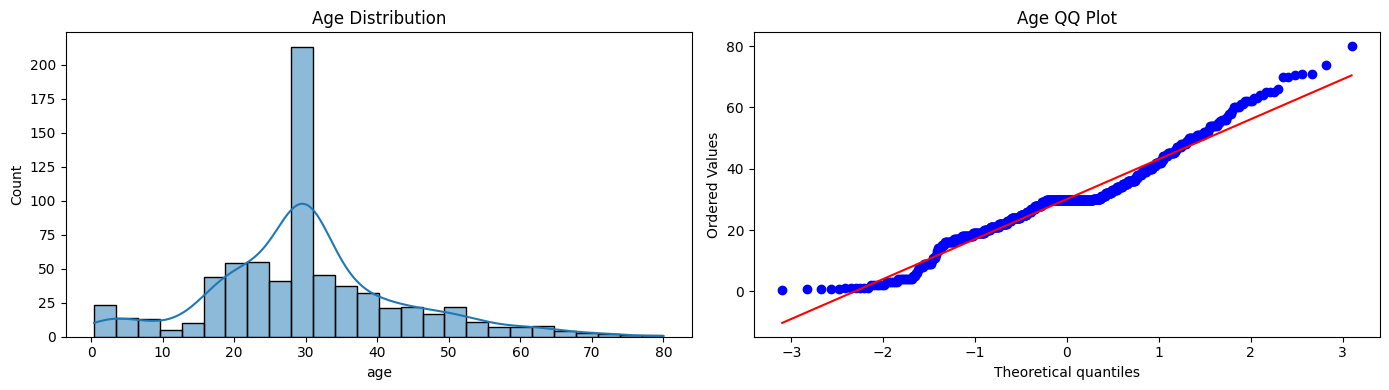

In [52]:
import scipy.stats as stats
# check the distribution of age and fare to see if they are normal distrubution or not
plt.figure(figsize=(14, 4))

# Plot 1: Age Histogram (using histplot for subplots)
plt.subplot(1, 2, 1)
sns.histplot(X_train['age'], kde=True)
plt.title("Age Distribution")

# Plot 2: Fare KDE (or Age KDE as in your example)
plt.subplot(1, 2, 2)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.tight_layout()
plt.show()

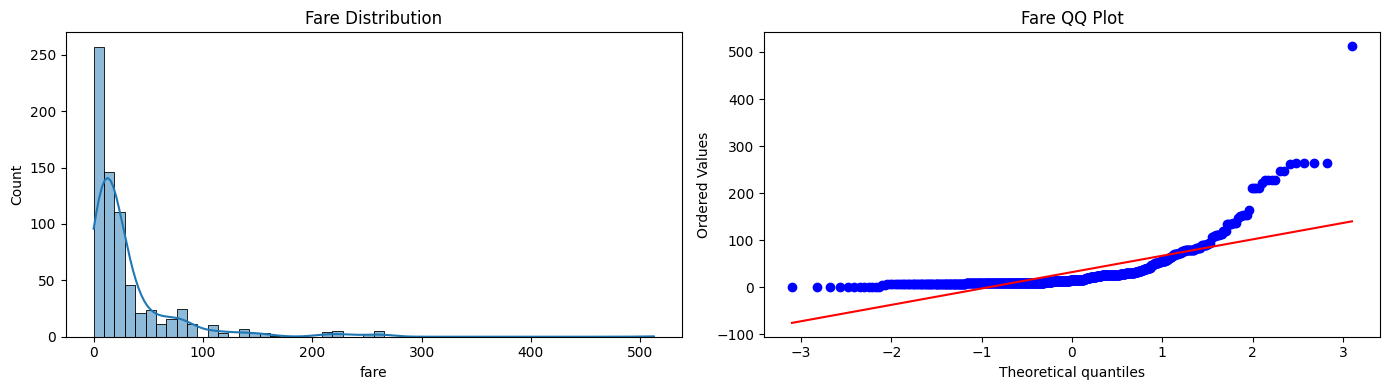

In [53]:
plt.figure(figsize=(14, 4))

# Plot 1: Age Histogram (using histplot for subplots)
plt.subplot(1, 2, 1)
sns.histplot(X_train['fare'], kde=True)
plt.title("Fare Distribution")

# Plot 2: Fare KDE (or Age KDE as in your example)
plt.subplot(1, 2, 2)
stats.probplot(X_train['fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.tight_layout()
plt.show()

In [56]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [57]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy LR: {accuracy_score(y_test, y_pred1)}")
print(f"Accuracy DT: {accuracy_score(y_test, y_pred2)}")

Accuracy LR: 0.6033519553072626
Accuracy DT: 0.6368715083798883


In [58]:
trf = FunctionTransformer(func=np.log1p)

In [59]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [60]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f"Accuracy LR: {accuracy_score(y_test, y_pred1)}")
print(f"Accuracy DT: {accuracy_score(y_test, y_pred2)}")

Accuracy LR: 0.6368715083798883
Accuracy DT: 0.6256983240223464


### Conclusion

Based on our experiment with the Titanic dataset, we can draw two significant conclusions about how data distributions affect different machine learning algorithms.

---

#### 1. Decision Trees are Transformation-Invariant

As observed in the accuracy scores, the **Decision Tree (DT)** performance remained almost identical (or completely unchanged) after applying the `FunctionTransformer`.

* **Why?** Decision Trees split data based on thresholds (e.g., `age > 30`). Since transformations like `log1p` are **monotonic** (they preserve the relative order of the data), the tree simply adjusts its split points to the new scale. It doesn't care about the shape of the distribution—only the order of the values.

#### 2. Linear Models Benefit from Normality

The **Logistic Regression (LR)** model showed a more noticeable shift in performance.

* **The Problem:** Our initial plots showed that `age` was already somewhat close to a normal distribution, but `fare` was **highly right-skewed** (a long tail of expensive tickets).
* **The Fix:** By applying the `np.log1p` transformation, we "squashed" the outliers in the `fare` column and brought the distribution closer to a Gaussian (bell) curve.
* **The Result:** Linear models like Logistic Regression rely on calculating weights for features; they perform much better when features are normally distributed because it prevents extreme values (like high fares) from disproportionately influencing the model's coefficients.


# Why Log transformer or any Function transformer


### Problem Setup

Suppose we’re predicting house prices.

Actual values:

```
y = [1,00,000, 10,00,000]
```

Two predictions:

```
ŷ = [50,000, 9,00,000]
```

---

### Case 1: Normal MSE (Absolute Error Focus)

Compute squared errors:

For 1,00,000:

```
Error = 1,00,000 - 50,000 = 50,000
Squared Error = 2,500,000,000
```

For 10,00,000:

```
Error = 10,00,000 - 9,00,000 = 1,00,000
Squared Error = 10,000,000,000
```

#### Total Loss:

```
12,500,000,000
```

#### What happened?

Even though:

* First prediction is 50% wrong
* Second prediction is only 10% wrong

The second one dominates loss because its absolute value is bigger.

The model cares more about big numbers.

---

### Case 2: Log-Space Regression

Now transform:

```
log(y)
log(ŷ)
```

Using natural log (approx values):

```
log(1,00,000)  ≈ 11.51
log(50,000)    ≈ 10.82
Difference     ≈ 0.69

log(10,00,000) ≈ 13.82
log(9,00,000)  ≈ 13.71
Difference     ≈ 0.11
```

Now square the differences:

```
0.69² ≈ 0.48
0.11² ≈ 0.012
```

#### Total Log Loss:

```
0.492
```

---

### What Changed?

Now the 50% error is clearly punished much more than the 10% error.

Loss reflects **relative (percentage-like) mistakes**, not raw magnitude.

The model stops over-focusing on large-value targets.

---

### Key Insight

Normal MSE asks:

> “How many rupees am I wrong?”

Log-MSE asks:

> “How many times (ratio-wise) am I wrong?”

That’s why log transformation helps when:

* Data is right-skewed
* Targets vary across large scales
* Relative accuracy matters more than absolute accuracy

---
